In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
#Generic Packages
import numpy as np
import os
import warnings
warnings.filterwarnings(action='ignore')
import pandas as pd

#Plotting Libraries
import seaborn as sn; sn.set(font_scale=1.4)
import matplotlib.pyplot as plt
#openCV
import cv2

#Tensor Flow
import tensorflow as tf

#Display Progress
from tqdm import tqdm

from skimage.transform import resize
from skimage.io import imread
from sklearn.model_selection import train_test_split

In [9]:
categories = []
rootdir = '/content/drive/MyDrive/project3/data/practice_image/flower_images'
for file in os.listdir(rootdir):
    d = os.path.join(rootdir, file)
    if os.path.isdir(d):
      categories.append(file)

categories_label = {category:i for i, category in enumerate(categories)} # 카테고리랑 숫자로 바꾼 값 dict형태로 만들기

In [10]:
categories_label

{'rose flower': 0,
 'sunflower flower': 1,
 'marigold flower': 2,
 'daisy flower': 3}

In [11]:
def load_data():

  rootdir = '/content/drive/MyDrive/project3/data/practice_image/flower_images'
  images = []
  labels = []
# Iterate through each folder corresponding to a category
  for category in categories:
    path = os.path.join(rootdir,category)
    label = categories_label[category]

# Iterate through each image in our folder
    for img in tqdm(os.listdir(path)):
      try:
        # Get the path name of the image
        img_path = os.path.join(path, img)

        # Open and resize the img
        image = cv2.imread(img_path)
        #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image,(224, 224))

        # Append the image and its corresponding label to the output
        images.append(image)
        labels.append(label)
      except Exception as someReadingError:
        pass

  return images , labels

In [12]:
#Loading Data (Training & Test Dataset)
Images, Labels = load_data()

100%|██████████| 50/50 [00:36<00:00,  1.36it/s]


In [13]:
X=np.array(Images)
Y=np.array(Labels)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),strides=(1, 1),activation='relu',padding='same', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(64,(3,3),strides=(1, 1) ,padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(128,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(256,(3,3),strides=(1, 1),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),


    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax') # 에러나서 카테고리 갯수만큼 3->4로 변경

])

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 112, 112, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 28, 28, 128)      

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = model.fit(X_train,y_train,epochs = 20,validation_split = 0.2)

Epoch 1/20
4/4 [==============================] - 7s 858ms/step - loss: 1.4840 - accuracy: 0.2913 - val_loss: 1.3665 - val_accuracy: 0.3125
Epoch 2/20
4/4 [==============================] - 0s 75ms/step - loss: 1.3289 - accuracy: 0.4094 - val_loss: 1.2540 - val_accuracy: 0.4062
Epoch 3/20
4/4 [==============================] - 0s 90ms/step - loss: 1.1197 - accuracy: 0.4961 - val_loss: 0.9672 - val_accuracy: 0.4688
Epoch 4/20
4/4 [==============================] - 0s 82ms/step - loss: 0.8186 - accuracy: 0.6142 - val_loss: 1.1491 - val_accuracy: 0.6562
Epoch 5/20
4/4 [==============================] - 0s 75ms/step - loss: 0.5330 - accuracy: 0.8189 - val_loss: 0.8983 - val_accuracy: 0.8125
Epoch 6/20
4/4 [==============================] - 0s 82ms/step - loss: 0.3405 - accuracy: 0.8661 - val_loss: 1.1732 - val_accuracy: 0.7500
Epoch 7/20
4/4 [==============================] - 0s 75ms/step - loss: 0.2997 - accuracy: 0.8583 - val_loss: 1.4841 - val_accuracy: 0.7188
Epoch 8/20
4/4 [==========

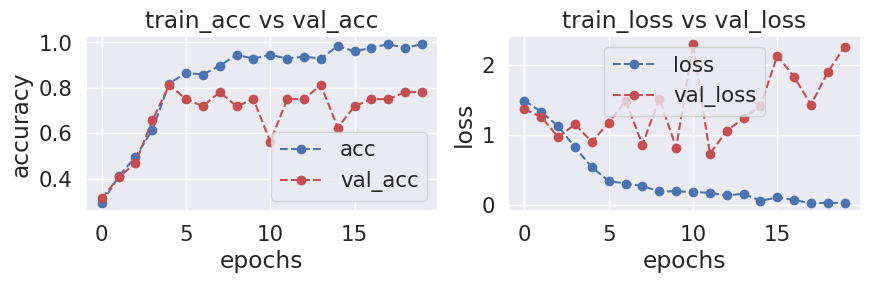

In [20]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

plot_accuracy_loss(history)

In [21]:
predictions = model.predict(X_test)

# Convert the logits to probabilities
probabilities = tf.nn.softmax(predictions)

# Get the class with the highest probability
predicted_classes = np.argmax(probabilities, axis=1)

# Compare the predicted classes with the actual classes
comparison = list(zip(predicted_classes, y_test))

# Display the first 10 predictions and actual values
for i in range(10):
    print(f'Predicted: {predicted_classes[i]}, Actual: {y_test[i]}')

2/2 [==============================] - 1s 475ms/step
Predicted: 1, Actual: 1
Predicted: 0, Actual: 0
Predicted: 2, Actual: 2
Predicted: 3, Actual: 3
Predicted: 1, Actual: 1
Predicted: 3, Actual: 3
Predicted: 2, Actual: 1
Predicted: 1, Actual: 1
Predicted: 1, Actual: 2
Predicted: 3, Actual: 3
